# pizza daily damand model- educational

## problem statment:<br>
A chain of pizza restaurants branches has a main center where pizza dough is produced and then sent to the branches.<br>
The dough remains in the branch's refrigerator, valid for a whole day, and through it, the daily demand is covered.<br>
The company wants to reduce costs by producing enough quantity for each branch throughout the day and delivering it at once time, also want to reduce the losses that occur as a result of spoilage of the dough 24 hours after its production.<br>
The manager of the company used the data analyst and asked him to make a model to estimate the daily demand of pizza for each branche.<br>
By knowing the number and size pizza demand, the amount of dough can be known.<br>
in this notebook, we We will review the steps taken by the data analyst to solve this problem and bulid the predictive model for one of the branches.

## step 1 - extract data and define the variables <br>

The data in the file: " Data Model - Pizza Sals.xlsx" represents the databas.<br>
The data analyst entered the branch's database and extracted the data that helps him achieve the goal.<br>

Based on the available data in the database, he determined that there are three variables that can affect the daily demand for pizza(independent variables or X ):<br>
- The day of the week X3: is it sunday (,1) Monday (,2) Tuesday(3) ? ....etc<br>
- day in the month X2: Is it the first day, the second day, the twentieth day, etc.?<br>
- time series X1(Demand changes over tim)<br>
Based on these variables, the following data were extracted:<br>
"Pizza Sale.csv"

According to the data, the daily demand is divided into five sizes of pizza (S, M, L, XL, XXL).<br>
Each of these sizes is considered to be the dependent variable (target Y).<br>
So at the end we should have 5 models<br>

NOTE: every code cell will be stand-alone, have its libraries and variables.<br>

## step 2 - fitting the model of the small pizza

In [1]:
#before fitting the "small pizza" model we need to delete the outliers from S column
import pandas as pd
from scipy import stats


df = pd.read_csv("Pizza Sales.csv")
# Calculate Z-scores
z_scores = stats.zscore(df['S'])

# Define a threshold for identifying outliers
threshold = 3

# Identify and remove outliers
outliers_removed = df[(z_scores < threshold) & (z_scores > -threshold)]

print(df.value_counts())
print(outliers_removed.value_counts())
outliers_removed.to_csv("pizza_S_outli_remo.csv")

Unnamed: 0  no_of_month day  time_seris  day_of_week  no_of_week_day  L   M   S   XL  XXL
0           1                1           thu          5               71  47  42  1   0      1
224         13               225         thu          5               48  34  48  0   0      1
244         2                245         wed          4               46  40  24  0   0      1
243         1                244         tue          3               47  41  52  3   0      1
242         31               243         mon          2               48  43  34  0   0      1
                                                                                            ..
117         28               118         tue          3               37  34  30  0   0      1
116         27               117         mon          2               50  39  43  1   0      1
115         26               116         sun          1               36  37  37  0   0      1
114         25               115         sat          7

The length before removing was 358 and be 354, so four outliers rows removed.<br>

In [2]:
#show only the data that will be used to fit the model of small pizza
import pandas as pd
df=pd.read_csv("pizza_S_outli_remo.csv")
dfS= df[["time_seris", "no_of_month day", "no_of_week_day", "S"]]
dfS.head()

,time_seris,no_of_month day,no_of_week_day,S
0,1,1,5,42
1,2,2,6,50
2,3,3,7,37
3,4,4,1,31
4,5,5,2,32


In [3]:
#check the correlation coefficient between the target s and other variables
dfS.corr()

,time_seris,no_of_month day,no_of_week_day,S
time_seris,1.000000,0.078678,-0.013341,-0.044891
no_of_month day,0.078678,1.000000,-0.000568,-0.107677
no_of_week_day,-0.013341,-0.000568,1.000000,0.308537
S,-0.044891,-0.107677,0.308537,1.000000


<br>As we see in the last row the correlation coefficient between s and  time_seris is very small -0.044891
also the "no_of_month day" small<br> 
there is only medeuim correlation between s and "no_of_week_day" 0.308537<br>

In [4]:
#step2.1 simple Linear Regression
#start modeling by simple Linear Regression where y= S column and x= "no_of_week_day" column

from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
df=pd.read_csv("pizza_S_outli_remo.csv")
dfS= df[["time_seris", "no_of_month day", "no_of_week_day", "S"]]

#splite data into train and test 
y_data = dfS[['S']]
x_data=dfS[["no_of_week_day"]]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

#bulid the Linear Regression object
lmS= LinearRegression()

#fit the train data and use cross validation to obtain R2 value 
lmS.fit(x_train, y_train)
cv_scores = cross_val_score(lmS, x_train, y_train, cv=10) #since the data is small, take large namber of folds (cv=10)
print(" with cross validation, R2 for train data is ", np.mean(cv_scores))

#fit the test data and use cross validation to obtain R2 value
lmS.fit(x_test, y_test)
cv_scores = cross_val_score(lmS, x_test, y_test, cv=10)
print(" with cross validation, R2 for test data is ", np.mean(cv_scores))

 with cross validation, R2 for train data is  0.07605382425773015
 with cross validation, R2 for test data is  -0.2289715281244303


<br>as we see the R-squre value of train data is close to zero, and R2 for test data is negative, so THE SIMPLE LINEAR MODELE FAILED!<br>

In [5]:
#step 2.2 multiple Linear Regression
# use the same previous code but change the "x_data"  variable to add the other varibles 

from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd

df=pd.read_csv("pizza_S_outli_remo.csv")
dfS= df[["time_seris", "no_of_month day", "no_of_week_day", "S"]]

#splite data into train and test 
y_data = dfS[['S']]
x_data=dfS[["time_seris", "no_of_month day", "no_of_week_day"]]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

#bulid the Linear Regression object
lmS= LinearRegression()

#fit the train data and use cross validation to obtain R2 value 
lmS.fit(x_train, y_train)
cv_scores = cross_val_score(lmS, x_train, y_train, cv=10) #since the data is small, take large namber of folds (cv=10)
print(" with cross validation, R2 for train data is ", np.mean(cv_scores))

#fit the test data and use cross validation to obtain R2 value
lmS.fit(x_test, y_test)
cv_scores = cross_val_score(lmS, x_test, y_test, cv=10)
print(" with cross validation, R2 for test data is ", np.mean(cv_scores))

 with cross validation, R2 for train data is  0.07799805225252492
 with cross validation, R2 for test data is  -0.21822670511952427


<br>As we see the R-square value of train data is close to zero, and R2 for test data is negative, so THE MULTIPLE LINEAR MODELE FAILED!<br>
also its wrose than simple

In [6]:
#step 2.2 polynomial  Regression

from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

df=pd.read_csv("pizza_S_outli_remo.csv")
dfS= df[["time_seris", "no_of_month day", "no_of_week_day", "S"]]

#splite data into train and test 
y_data = dfS[['S']]
x_data=dfS[["time_seris", "no_of_month day", "no_of_week_day"]]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

#check R2 vlues for every degree from 1 to 10 degree
dg=[1,2,3,4,5,6,7,8,9,10]
for d in dg:
    pr = PolynomialFeatures(degree=d)

    #fit the train data and use cross validation to obtain R2 value 
    xtrain_poly=pr.fit_transform(x_train[["time_seris", "no_of_month day", "no_of_week_day"]])
    lm = LinearRegression()
    lm.fit(xtrain_poly, y_train)
    cv_scores = cross_val_score(lm, xtrain_poly, y_train, cv=10)
    print(d,"  with cross validation, R2 for train data is ", np.mean(cv_scores))
    
    #fit the test data and use cross validation to obtain R2 value 
    xtest_poly=pr.fit_transform(x_test[["time_seris", "no_of_month day", "no_of_week_day"]])
    lm.fit(xtest_poly, y_test)
    cv_scorest = cross_val_score(lm, xtest_poly, y_test, cv=10)
    print(d,"  with cross validation, R2 for test data is ", np.mean(cv_scorest))


1   with cross validation, R2 for train data is  0.07799805225252485
1   with cross validation, R2 for test data is  -0.21822670511952486
2   with cross validation, R2 for train data is  1.0470590375066812e-06
2   with cross validation, R2 for test data is  -0.36866873878953044
3   with cross validation, R2 for train data is  -0.016195349475512055
3   with cross validation, R2 for test data is  -0.5743961234994133
4   with cross validation, R2 for train data is  -1.5509809611387644
4   with cross validation, R2 for test data is  -0.9565195852114033
5   with cross validation, R2 for train data is  -1.1606147456818454
5   with cross validation, R2 for test data is  -12.57873102833355
6   with cross validation, R2 for train data is  -4.33442632703787
6   with cross validation, R2 for test data is  -167.60893258368407
7   with cross validation, R2 for train data is  -3.6159553914525
7   with cross validation, R2 for test data is  -1536.1191606213565
8   with cross validation, R2 for train 

All R2 values ​​are either negative or heading towards zero, which also means the FAILURE of the Polynomial model!<br>

What are the possible reasons for the failure of previous models:<br>

- The amount of data is small, its only for one year(about 354 row)<br> 
- Influential variables are missing, for example a variable such as: are there any discount offers on this day?, or: is this day considered an official holiday?, or something else..<br> 
The existence of these variables will certainly improve the ability to predict demand

<br>Now we've confirmed that the models fail, let's take a look at the scatter plot of time seris regression<br>

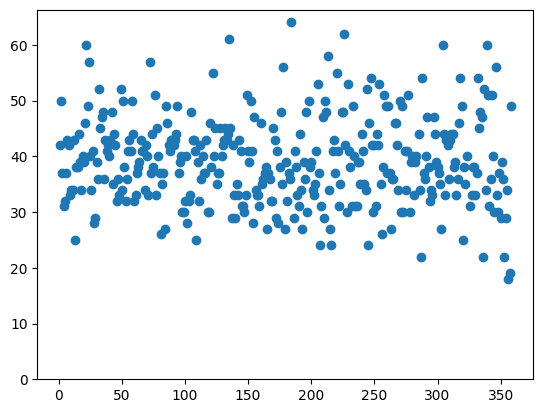

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("pizza_S_outli_remo.csv")
dfS= df[["time_seris", "no_of_month day", "no_of_week_day", "S"]]

x= dfS["time_seris"]
y= dfS["S"]
plt.scatter(x, y)
plt.ylim(0,)
plt.show()

From the chart, it appears that the distribution of points falls between the range 25 to 60. The concentration of points increases as we approach the middle of the range, and decreases as we move towards the outskirts.<br>
This behavior is generally similar to the behavior of the normal distribution.<br>

note:  Experienced data analysts start their first steps by looking at the data chart and can determine from the start whether regression analysis is useful or not.

<br>Since we know that there is a correlation between "no_of_week_day" with the demand, we can now assume that the data for each day of the week follows the normal distribution, then we confirm this hypothesis, then if it is confirmed, we find the confidence interval(CI) for the demand of small pizza for each day.<br>

## step 3 - check the normallity of small pizza demand

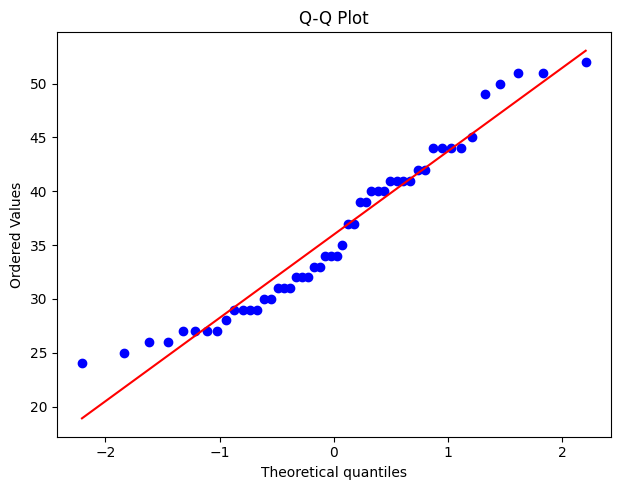

D'Agostino and Pearson Test: Statistic = 4.6248, p-value = 0.0990


In [8]:
#step 3 - check the normallity of small pizza demand
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest
import scipy.stats as stats
import pandas as pd
from scipy.stats import norm

# validate the normal distribution of the first week day (sunday) 
df=pd.read_csv("pizza_S_outli_remo.csv")
df = df[df["no_of_week_day"]==1]
plt.figure(figsize=(12, 5))

#validate by Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(df["S"], dist="norm", plot=plt)
plt.title("Q-Q Plot")

plt.tight_layout()
plt.show()

#  statistical normallity test D'Agostino and Pearson's test
stat_dap, p_dap = normaltest(df["S"])
print(f"D'Agostino and Pearson Test: Statistic = {stat_dap:.4f}, p-value = {p_dap:.4f}")


<br>It is noted that the Q-Q plot represents a straight line
And the p value was 0.099, which is greater than 0.05, therefore it was confirmed that graphically and statistically the distribution of small pizza demand on Sundays follows the normal distribution.<br>

## step 4 - finding 95% CI

In [9]:
#step 4 - finding 95% CI
import numpy as np
import pandas as pd
from scipy.stats import norm

df=pd.read_csv("pizza_S_outli_remo.csv")
df = df[df["no_of_week_day"]==1]
confidence_level = 0.95
data_mean = np.mean(df["S"])
data_std = np.std(df["S"])
margin_of_error = norm.ppf(1 - (1 - confidence_level) / 2) * (data_std / np.sqrt(len(df["S"])))

lower_bound = data_mean - margin_of_error
upper_bound = data_mean + margin_of_error

print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Confidence Interval: (33.8607, 38.0993)


In [10]:
#Repeat steps 3 and 4 for the rest of the week to find the CI of all  days of week

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest
import scipy.stats as stats
import pandas as pd
from scipy.stats import norm

df=pd.read_csv("pizza_S_outli_remo.csv")
days=[1,2,3,4,5,6,7]
for d in days:
    dfS = df[df["no_of_week_day"]==d]
    stat_dap, p_dap = normaltest(dfS["S"])
    print(d ,f"D'Agostino and Pearson Test: Statistic = {stat_dap:.4f}, p-value = {p_dap:.4f}")
    confidence_level = 0.95
    data_mean = np.mean(dfS["S"])
    data_std = np.std(dfS["S"])
    margin_of_error = norm.ppf(1 - (1 - confidence_level) / 2) * (data_std / np.sqrt(len(dfS["S"])))
    lower_bound = data_mean - margin_of_error
    upper_bound = data_mean + margin_of_error
    print(d,f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

1 D'Agostino and Pearson Test: Statistic = 4.6248, p-value = 0.0990
1 Confidence Interval: (33.8607, 38.0993)
2 D'Agostino and Pearson Test: Statistic = 1.5196, p-value = 0.4678
2 Confidence Interval: (35.6048, 38.9050)
3 D'Agostino and Pearson Test: Statistic = 1.6660, p-value = 0.4348
3 Confidence Interval: (36.0589, 39.8234)
4 D'Agostino and Pearson Test: Statistic = 1.8199, p-value = 0.4025
4 Confidence Interval: (34.8282, 39.2502)
5 D'Agostino and Pearson Test: Statistic = 4.0372, p-value = 0.1328
5 Confidence Interval: (37.9791, 41.6748)
6 D'Agostino and Pearson Test: Statistic = 1.5545, p-value = 0.4597
6 Confidence Interval: (41.1075, 45.7325)
7 D'Agostino and Pearson Test: Statistic = 2.8285, p-value = 0.2431
7 Confidence Interval: (40.4382, 44.9904)


In [11]:
#show the days of week and CI limits as a table 
import pandas as pd 
small_pizzaCI={"SUN":[33.8607, 38.0993], "MON": [35.6048, 38.9050], "TUE" : [36.0589, 39.8234],
               "WED":[34.8282, 39.2502], "THU": [37.9791, 41.6748], "FRI": [41.1075, 45.7325], "SAT": [40.4382, 44.9904]}
dfS_output=pd.DataFrame(small_pizzaCI)
dfS_output=dfS_output.rename(index={0: "minCI", 1: "maxCI"})
dfS_output.head()

,SUN,MON,TUE,WED,THU,FRI,SAT
minCI,33.8607,35.6048,36.0589,34.8282,37.9791,41.1075,40.4382
maxCI,38.0993,38.9050,39.8234,39.2502,41.6748,45.7325,44.9904


Note: the same previous steps must be taken to find a confidence interval tables for each of the rest sizes (M, L, XL, XXL)

## The suggested solutions

<br>Finally, the data analyst proposed the following two solutions:<br>
1- Providing the branch with "maxCI" value to reduce the possibility of running out of dough.<br>
2- Dividing the process of supplying the branch into two batches<br>
The first batche is defining by "minCI" and a second batch if the first batch runs out.<br>

<br>NOTE :If the administration chooses the second solution,<br>
The data analyst must build a mathematical model to determine the amount of the second batch.<br>
For example, this model might be based on the number of working hours remaining before the next day's batch arrives.<br>

Best Wishes <br>

### Author:
Eng Mohammed Almekhlafi<br>

### data source:
https://www.kaggle.com/datasets/shilongzhuang/pizza-sales<br>